In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso 

In [2]:
df_raw = pd.read_excel("ENB2012_data.xlsx")
df =df_raw.copy()
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.isna().any(axis=1).value_counts()

False    768
Name: count, dtype: int64

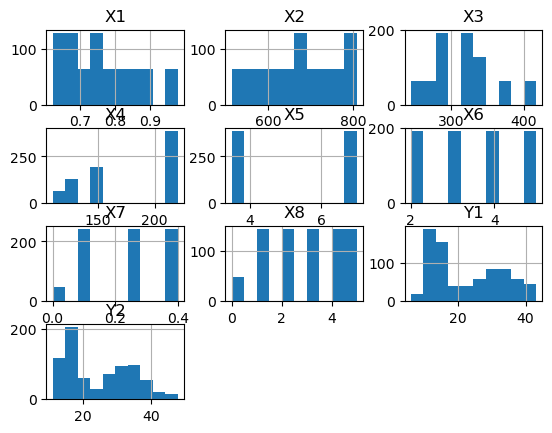

In [5]:
df.hist();

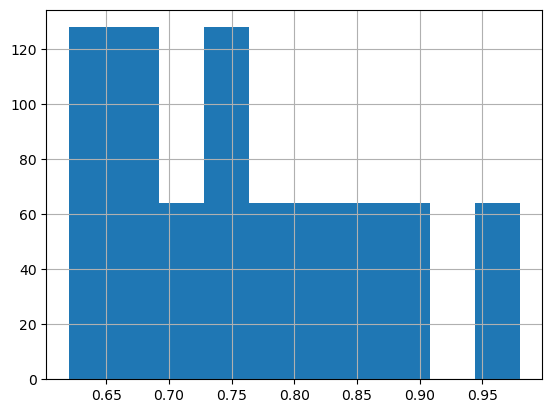

In [6]:
df.X1.hist();

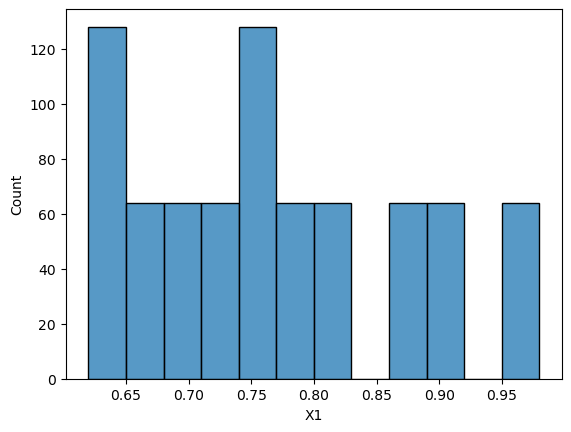

In [7]:
sns.histplot(df.X1);

<Axes: xlabel='X1'>

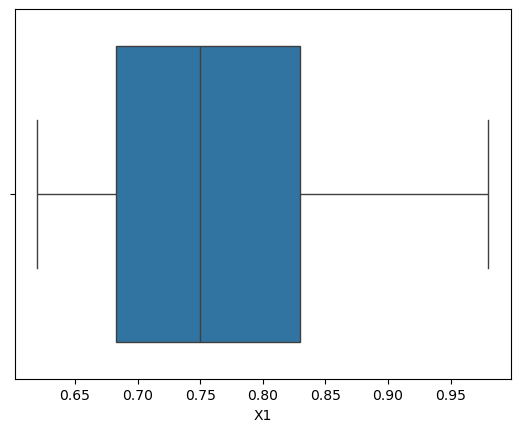

In [8]:
sns.boxplot(x=df.X1)

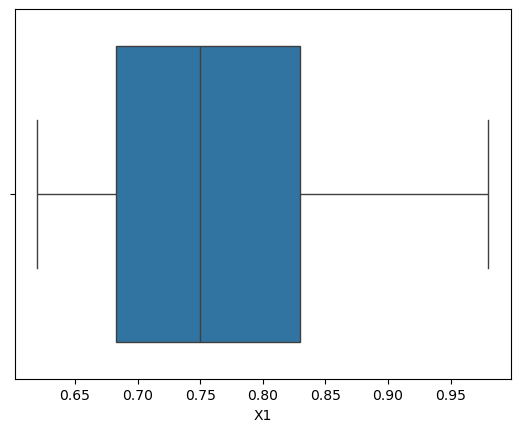

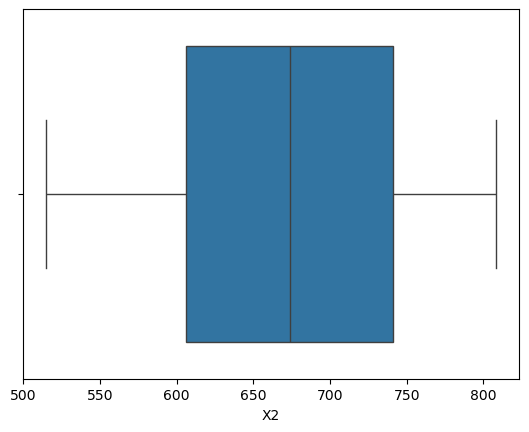

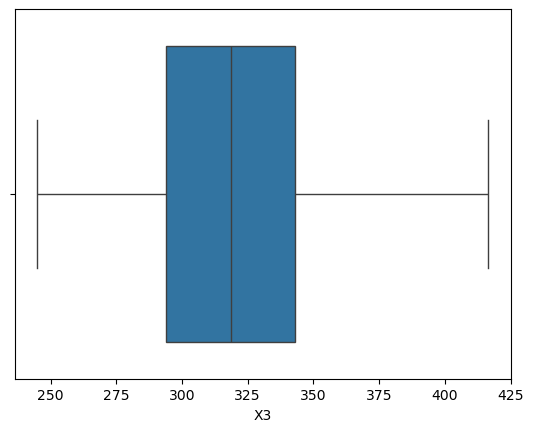

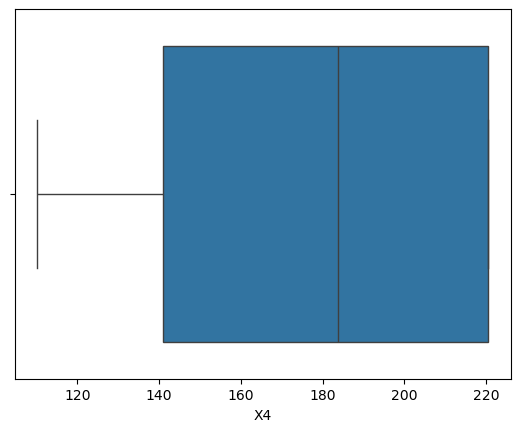

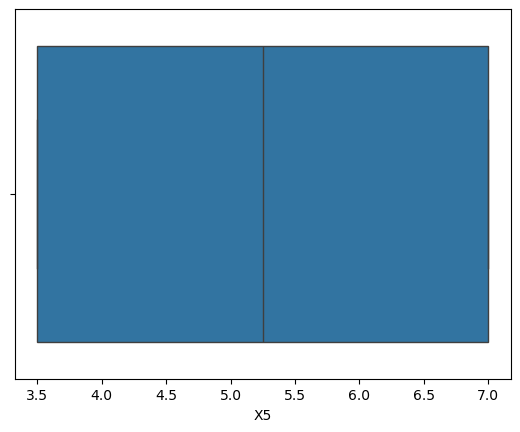

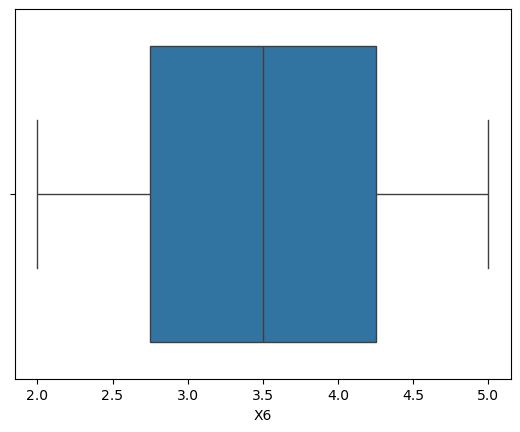

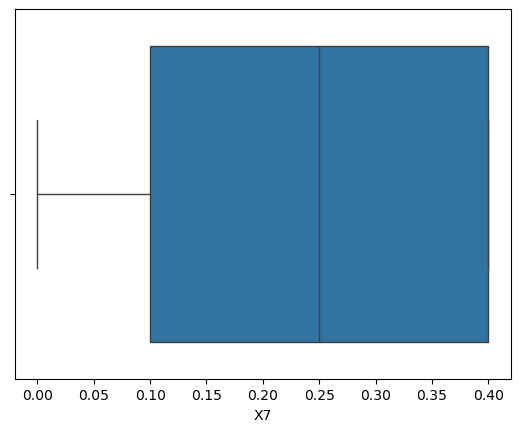

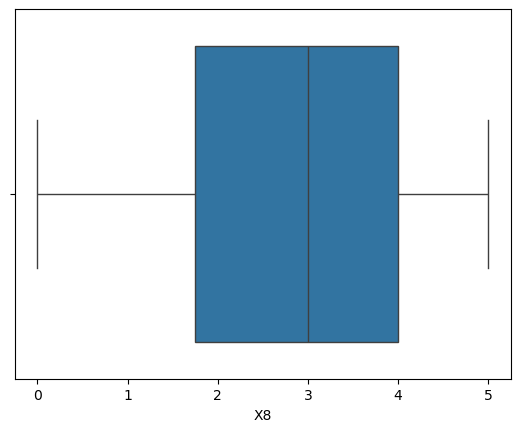

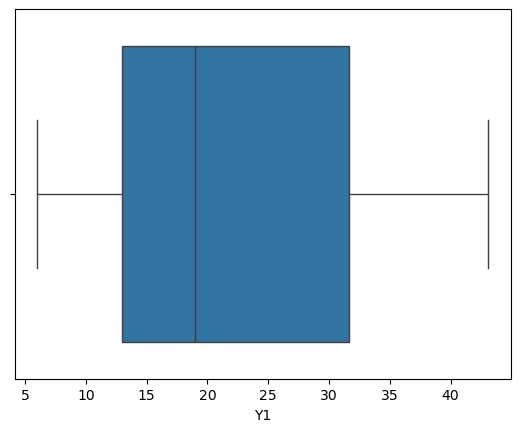

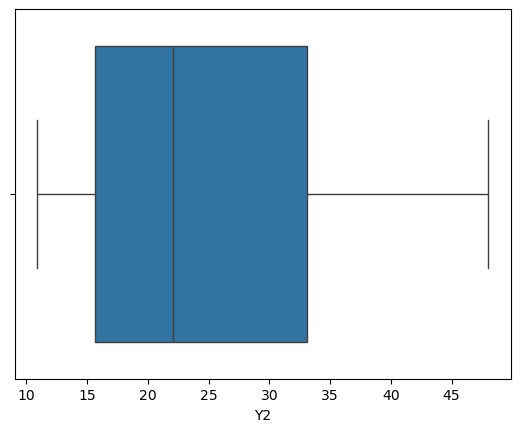

In [9]:
def boxplots(df):
   for column in df:
       sns.boxplot(x=df[column])
       plt.show()

boxplots(df)    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


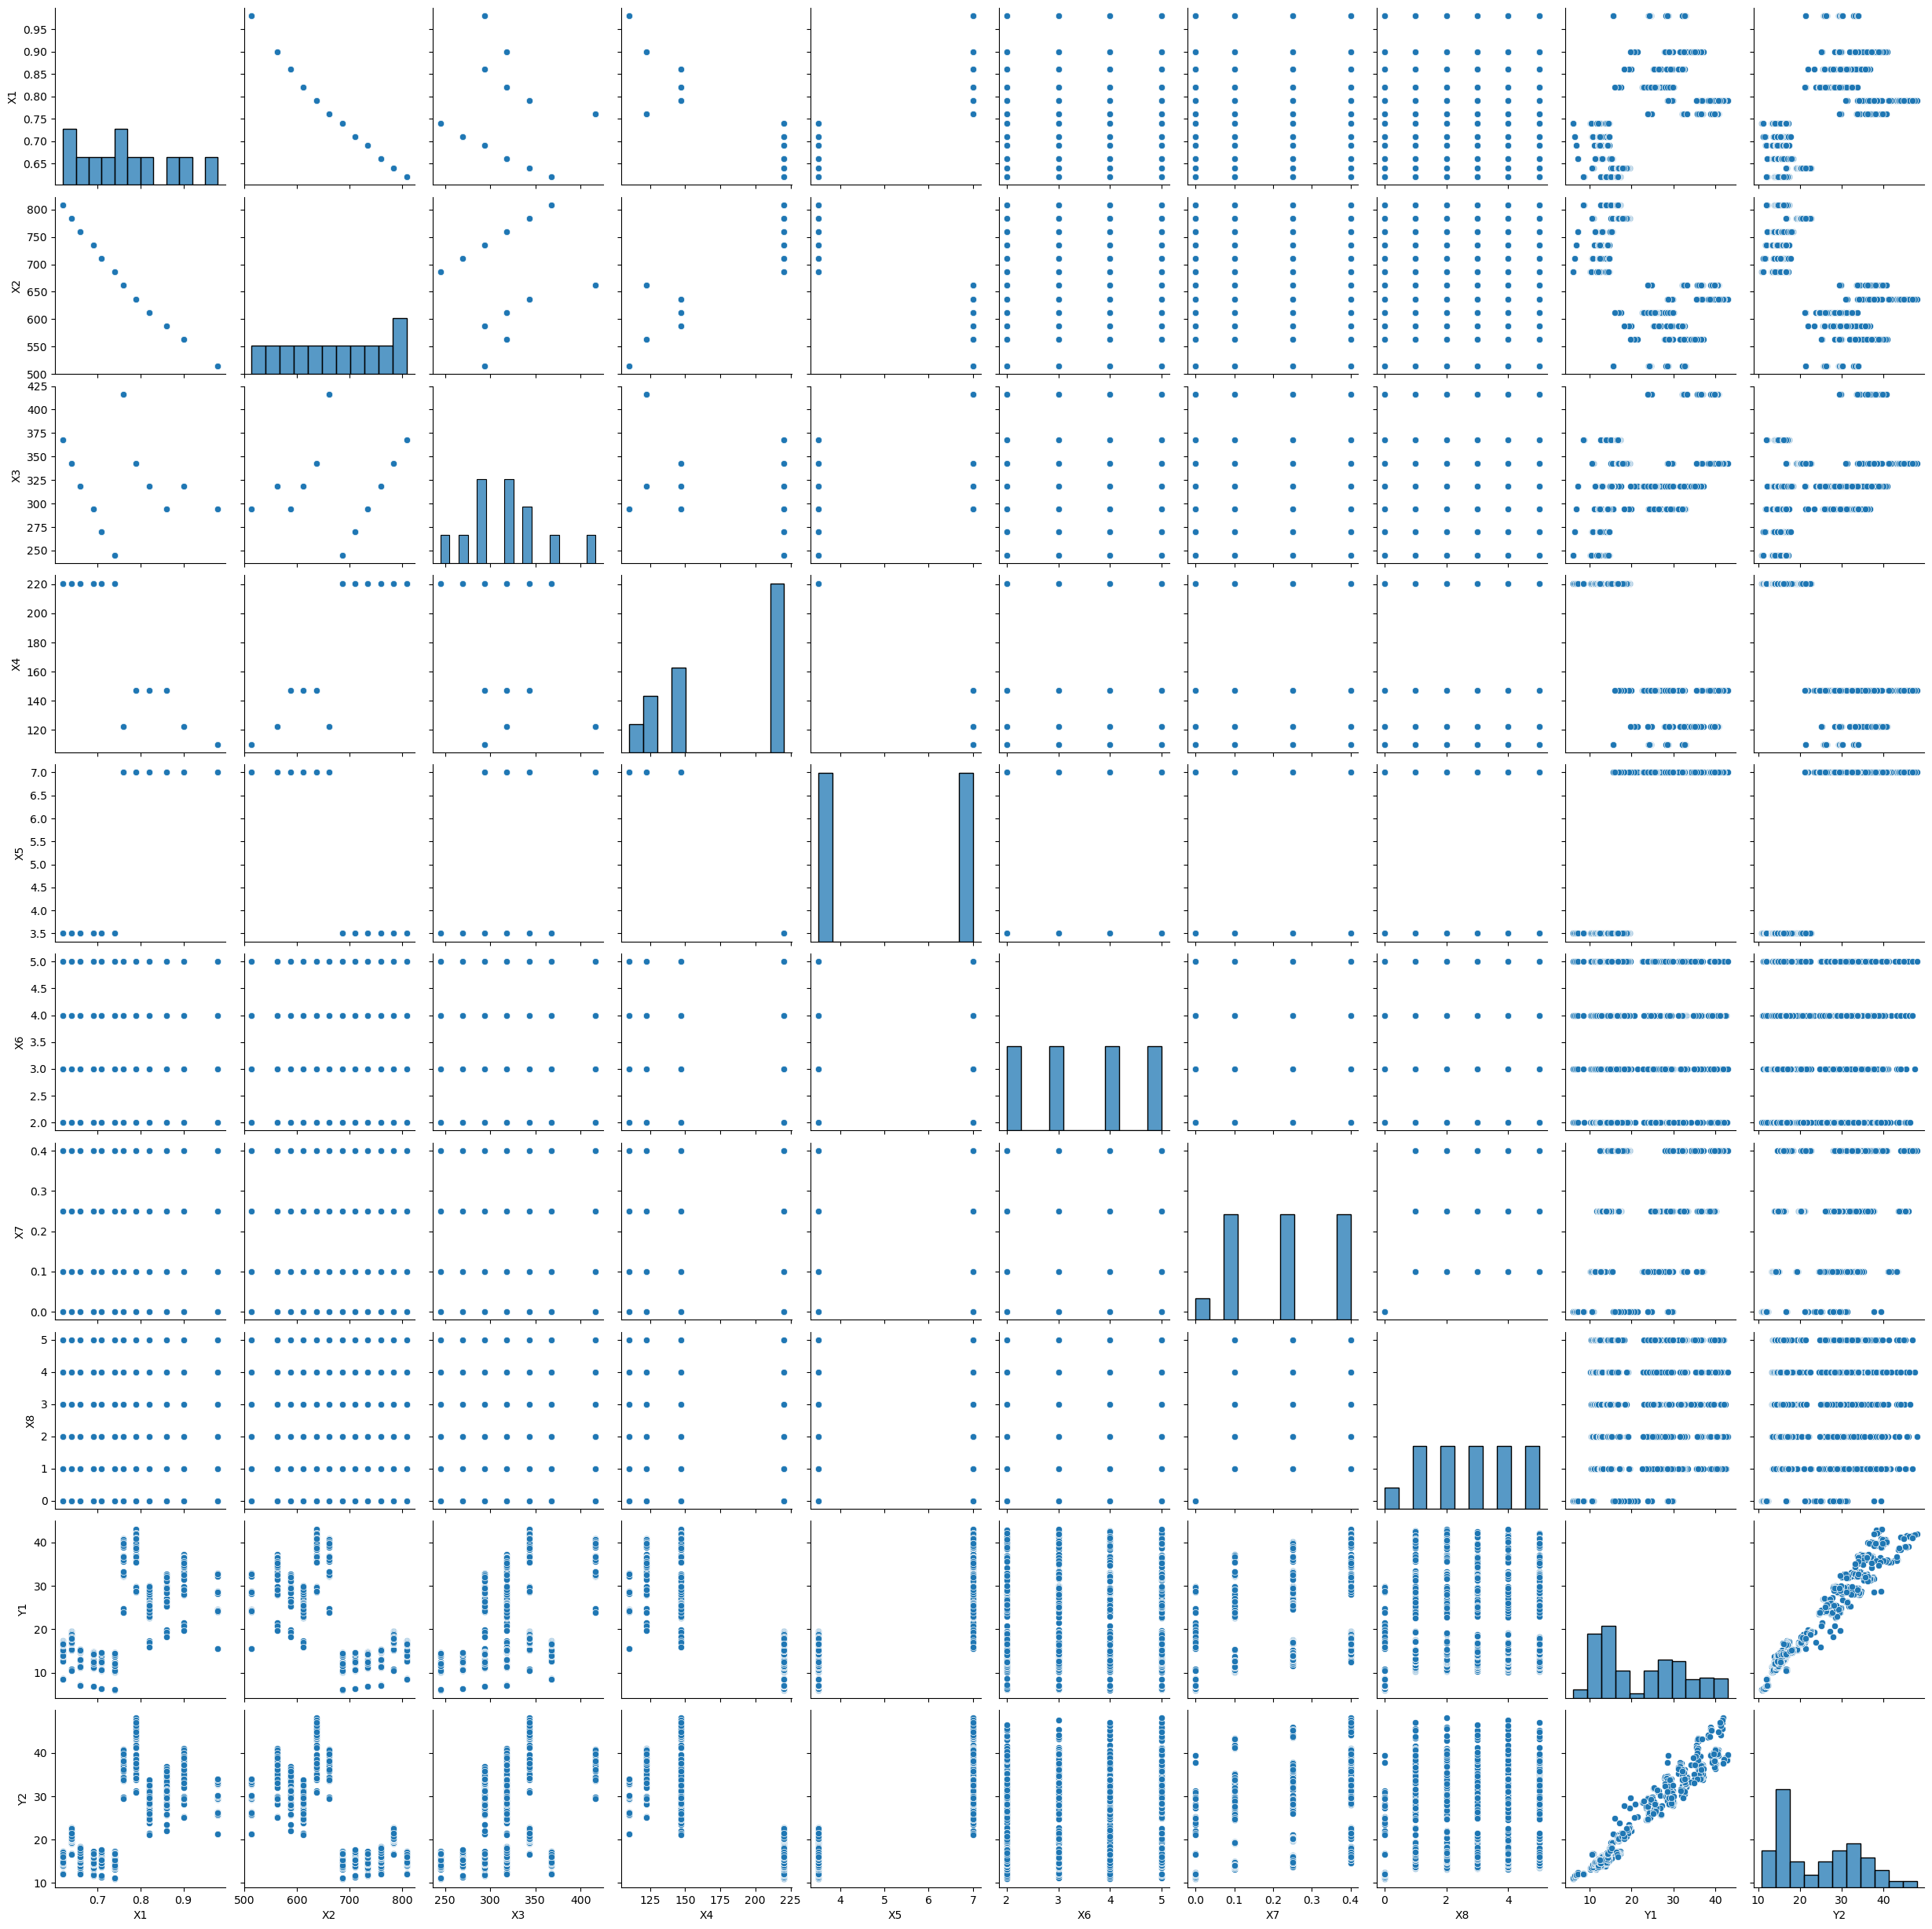

In [11]:
sns.pairplot(df)
plt.savefig("pic.png")
plt.show()

In [12]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [13]:
# x1 and y1 strong positive korrelation
# x2 and y1 strong negative korrelation
# x3 and y1 moderate korrelation
# x4 aand y1 very strong negative korrelation
# x5 and y1 very strong positive korrelation
# x6 and x8 no korrelation with Y1
# x 7 and y1 veak korrelation


In [14]:
df.X5.value_counts()

X5
7.0    384
3.5    384
Name: count, dtype: int64

In [15]:
df.tail(20)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
748,0.71,710.5,269.5,220.5,3.5,2,0.4,5,12.43,15.59
749,0.71,710.5,269.5,220.5,3.5,3,0.4,5,12.63,14.58
750,0.71,710.5,269.5,220.5,3.5,4,0.4,5,12.76,15.33
751,0.71,710.5,269.5,220.5,3.5,5,0.4,5,12.42,15.31
752,0.69,735.0,294.0,220.5,3.5,2,0.4,5,14.12,16.63
753,0.69,735.0,294.0,220.5,3.5,3,0.4,5,14.28,15.87
754,0.69,735.0,294.0,220.5,3.5,4,0.4,5,14.37,16.54
755,0.69,735.0,294.0,220.5,3.5,5,0.4,5,14.21,16.74
756,0.66,759.5,318.5,220.5,3.5,2,0.4,5,14.96,17.64
757,0.66,759.5,318.5,220.5,3.5,3,0.4,5,14.92,17.79


In [16]:
df.Y1.value_counts()

Y1
15.16    6
13.00    5
15.23    4
28.15    4
14.60    4
        ..
33.21    1
36.77    1
36.71    1
37.03    1
16.64    1
Name: count, Length: 587, dtype: int64

## model selection and evaluation

In [18]:
X_model_1 = df[["X5"]]
y_model = df["Y1"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_model_1, y_model, test_size=0.2, random_state=32)

In [19]:
# Build and train the linear regression model 
model_1 = LinearRegression() 
model_1.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict on the test set 
y_pred = model_1.predict(X_test)

In [21]:
# Evaluate the model 
mse_1 = mean_squared_error(y_test, y_pred) 
r2_1 = r2_score(y_test, y_pred) 
intercept_1 = model_1.intercept_ 
coeff_1 = model_1.coef_[0] 

# Print evaluation results 
print("Linear Regression Model (X5 -> Y1)") 
print(f"Mean Squared Error (MSE): {mse_1:.4f}") 
print(f"R-Squared (R²): {r2_1:.4f}") 
print(f"Intercept: {intercept_1:.4f}") 
print(f"Coefficient (X5): {coeff_1:.4f}")


Linear Regression Model (X5 -> Y1)
Mean Squared Error (MSE): 24.5862
R-Squared (R²): 0.7721
Intercept: -4.4984
Coefficient (X5): 5.0983


In [22]:
# X5 positive effect on Y1

In [23]:
# Define the two features (X5 and X1) and target (Y1)
X_model_2 = df[["X5", "X1"]]
y_model = df["Y1"]

In [24]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_model_2, y_model, test_size=0.2, random_state=63
)

In [25]:
# Build and train the linear regression model

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [26]:
# Predict on the test set

y_pred_2 = model_2.predict(X_test_2)

In [27]:
# Evaluate the model

mse_2 = mean_squared_error(y_test_2, y_pred_2)
r2_2 = r2_score(y_test_2, y_pred_2)
intercept_2 = model_2.intercept_
coefficients_2 = model_2.coef_

# Print evaluation results

print("Linear Regression Model (X5, X1 -> Y1)")
print(f"Mean Squared Error (MSE): {mse_2:.4f}")
print(f"R-Squared (R²): {r2_2:.4f}")
print(f"Intercept: {intercept_2:.4f}")
print(f"Coefficients:")
print(f"  - X5: {coefficients_2[0]:.4f}")
print(f"  - X1: {coefficients_2[1]:.4f}")

Linear Regression Model (X5, X1 -> Y1)
Mean Squared Error (MSE): 20.5984
R-Squared (R²): 0.7800
Intercept: 13.2644
Coefficients:
  - X5: 6.9518
  - X1: -35.6792


In [69]:
#combining X1 and X5 improve the predictability of the model

## Lasso Regression

In [30]:
# Define the features (X1 to X8) and target (Y1)
X_model_lasso = df.iloc[:, :8]
y_model = df["Y1"]

# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_model_lasso, y_model, test_size=0.2, random_state=471)


# Apply Lasso regression with cross-validation to find the best alpha 
lasso = Lasso(alpha=0.1, random_state=471) 
lasso.fit(X_train_3, y_train_3)

Lasso(alpha=0.1, random_state=471)

In [31]:
# Predict on the test set 
y_pred_3 = lasso.predict(X_test_3)

# Evaluate the Lasso regression model 
mse_3 = mean_squared_error(y_test_3, y_pred_3) 
r2_3 = r2_score(y_test_3, y_pred_3)

# Coefficients of the Lasso model 
lasso_coefficients = pd.DataFrame({ "Feature": X_model_lasso.columns, "Coefficient": lasso.coef_ })

In [67]:
# Print results 
print("Lasso Regression Model (Y1)") 
print(f"Mean Squared Error (MSE): {mse_3:.4f}") 
print(f"R-Squared (R²): {r2_3:.4f}") 
print("Coefficients:") 

print(lasso_coefficients)

Lasso Regression Model (Y1)
Mean Squared Error (MSE): 9.1137
R-Squared (R²): 0.9106
Coefficients:
  Feature  Coefficient
0      X1    -0.000000
1      X2     0.007080
2      X3     0.046976
3      X4    -0.000000
4      X5     5.055655
5      X6    -0.013921
6      X7    14.107779
7      X8     0.239828


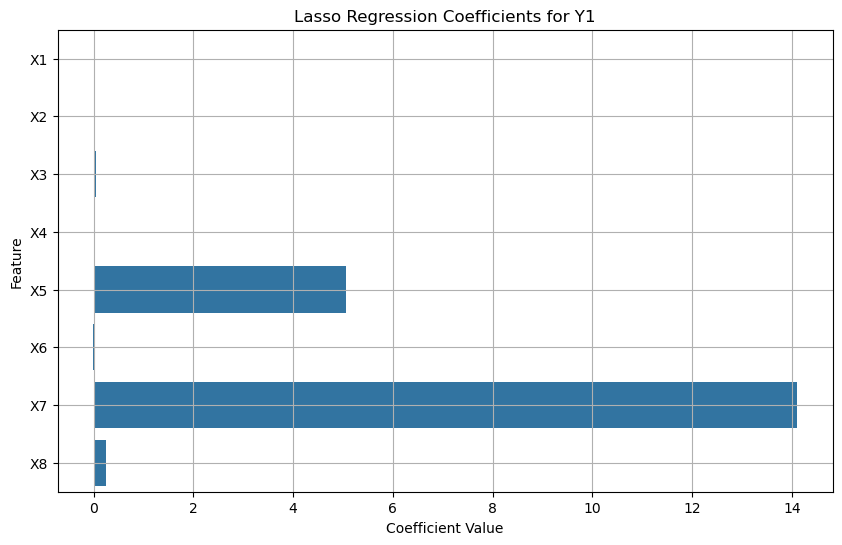

In [73]:
# Visualize the coefficients 
plt.figure(figsize=(10, 6)) 
sns.barplot(x=lasso_coefficients["Coefficient"], y=lasso_coefficients["Feature"], orient='h') 
plt.title("Lasso Regression Coefficients for Y1") 
plt.xlabel("Coefficient Value") 
plt.ylabel("Feature") 
plt.grid(True) 
plt.show()

## neural network regression

In [104]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Input 
from tensorflow.keras.optimizers import Adam 
from sklearn.preprocessing import StandardScaler

In [88]:
# Define the features (X1 to X8) and target (Y1)
X_model_nn = df.iloc[:, :8]
y_model = df["Y1"]

# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_model_nn, y_model, test_size=0.2, random_state=490)

# Scale the features 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train_4) 
X_test_scaled = scaler.transform(X_test_4)

# Define the neural network architecture
model_nn = Sequential([Input(shape=(X_train_scaled.shape[1],)), # Explicit Input layer 
                       Dense(16, activation='relu'), # First hidden layer 
                       Dropout(0.2), # Dropout for regularization 
                       Dense(8, activation='relu'), # Second hidden layer 
                       Dropout(0.2), 
                       Dense(4, activation='relu'), # Third hidden layer 
                       Dense(1, activation='linear') # Output layer for regression                    
                      ])

# Compile the model 
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model 
history = model_nn.fit(X_train_scaled, 
                    y_train_4, 
                    validation_data=(X_test_scaled, y_test_4), 
                    epochs=100, 
                    batch_size=16, 
                    verbose=0)

In [90]:
# Evaluate the model 
loss_nn, mae_nn = model_nn.evaluate(X_test_scaled, y_test_4, verbose=0) 

# Predict on the test set 
y_pred_nn = model_nn.predict(X_test_scaled) 

# Display evaluation results 
print("Neural Network Regression Model") 
print(f"Mean Absolute Error (MAE): {mae_nn:.4f}") 
print(f"Loss (MSE): {loss_nn:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Neural Network Regression Model
Mean Absolute Error (MAE): 2.6319
Loss (MSE): 12.4829


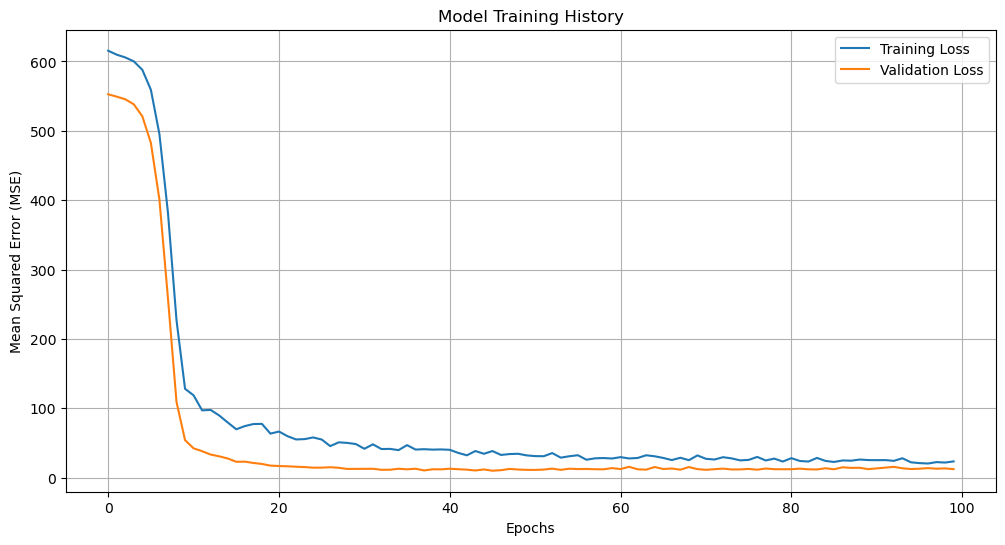

In [94]:
# Plot training history
plt.figure(figsize=(12, 6)) 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Model Training History') 
plt.xlabel('Epochs') 
plt.ylabel('Mean Squared Error (MSE)') 
plt.legend() 
plt.grid(True) 
plt.show()

In [106]:
# Compute R^2
y_test_mean = np.mean(y_test_4) 
ss_res = np.sum((y_test_4 - y_pred_nn.flatten())**2) 

# Residual sum of squares 
ss_tot = np.sum((y_test_4 - y_test_mean)**2) 

# Total sum of squares 
r2_nn = 1 - (ss_res / ss_tot) 

# Display the R^2 value 
print(f"R² (Neural Network): {r2_nn:.4f}")

R² (Neural Network): 0.8684


## Comparing
Linear regression: 
- Mean Squared Error (MSE): 20.5984
- R-Squared (R²): 0.7800


Lasso:
- Mean Squared Error (MSE): 9.1137 (smallest MSE, better, highest performance)
- R-Squared (R²): 0.9106 (highest R-squared better)


Neural Network:
- Mean Absolute Error (MAE): 2.6319
- R-Squared (R²): 0.8684
- Loss (MSE): 12.4829